C:\Users\zacha\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (11,21,22,23,59,76) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


SPEEDLIMIT
0.0     0.134228
20.0    0.102104
25.0    0.142771
30.0    0.112848
35.0    0.089337
dtype: float64


<IPython.core.display.Javascript object>


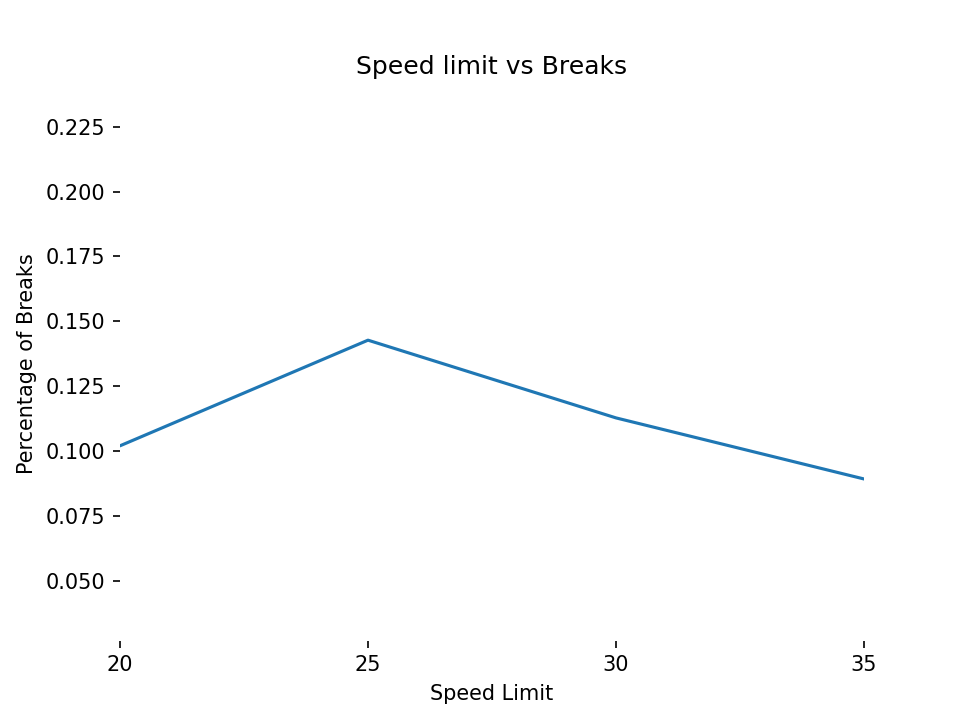

Text(0.5, 0, 'Speed Limit')

In [42]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv('full_dataset.csv')

df1 = df[['SPEEDLIMIT','ONEWAY']]
df2 = df[['SPEEDLIMIT','Size']]
df1 = df1.groupby('SPEEDLIMIT').agg(['count'])
df2 = df2.dropna()
df2 = df2.groupby('SPEEDLIMIT').agg(['count'])
df_fin = df2['Size','count'] / df1['ONEWAY','count']
print(df_fin.head())


%matplotlib notebook

plt.figure()
plt.plot(df_fin.index, df_fin,'-')

axes = plt.gca()
axes.set_xlim([20,35])
axes.set_xticks([20,25,30,35])
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.title('Speed limit vs Breaks')
plt.ylabel('Percentage of Breaks')
plt.xlabel('Speed Limit')



           ONEWAY
            count
PVMTCATEGO       
              217
ART         16831
MLTUSETRL     653
NON-ART     44421
NONE          529
PATHWAY        68             Size
           count
PVMTCATEGO      
              17
ART         2178
MLTUSETRL     52
NON-ART     4573
NONE          41
PATHWAY        3
1    0.129404
2    0.079632
3    0.102947
4    0.077505
5    0.044118
Name: 0, dtype: float64


<IPython.core.display.Javascript object>


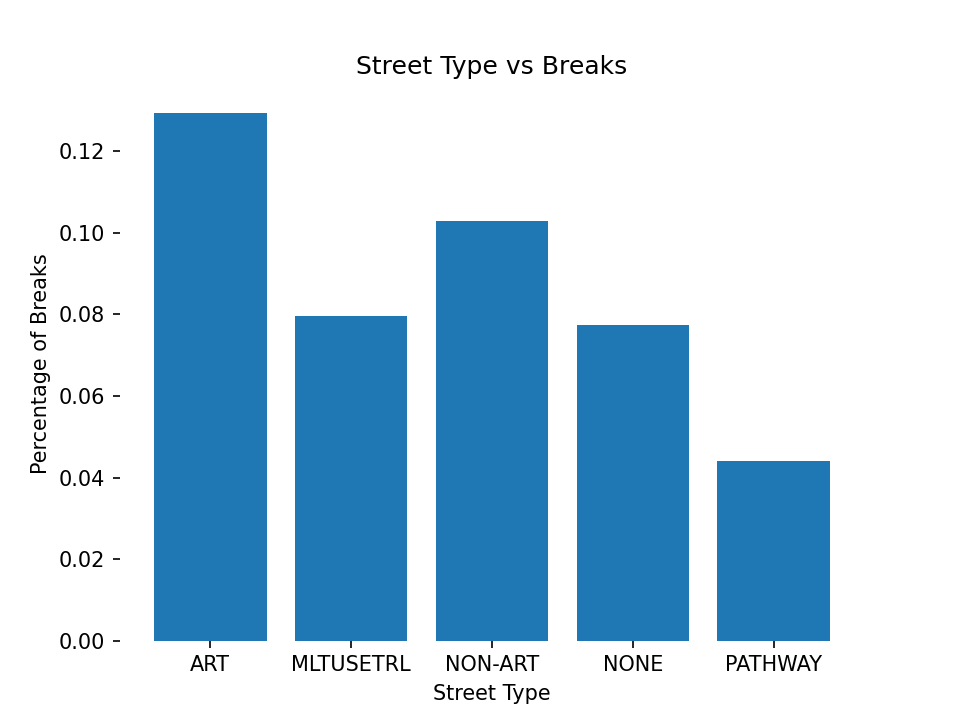

Text(0.5, 0, 'Street Type')

In [44]:
import math

df3 = df[['PVMTCATEGO','ONEWAY']]
df4 = df[['PVMTCATEGO','Size']]

df3 = df3[df3['PVMTCATEGO'] != 'PVMTTOPARK'] #& df3['PVMTCATEGO'] != 'PATHWAY']
df3 = df3.dropna()
df3 = df3.groupby('PVMTCATEGO').agg(['count'])
df4 = df4.dropna()
df4 = df4.groupby('PVMTCATEGO').agg(['count'])
print(df3, df4)
df_fin2 = df4['Size','count'] / df3['ONEWAY','count']
df_fin2 = df_fin2.reset_index()
df_fin2 = df_fin2.drop(index = 0)
labels = df_fin2['PVMTCATEGO']
print(df_fin2[0])
plt.figure()
plt.bar(labels, df_fin2[0])#, yerr = err_vals, capsize = 10)

for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.title('Street Type vs Breaks')
plt.ylabel('Percentage of Breaks')
plt.xlabel('Street Type')